# Load and Read data


In [2]:
import pandas as pd 
import numpy as np 
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## Data Visualization and Cleaning 

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(3)

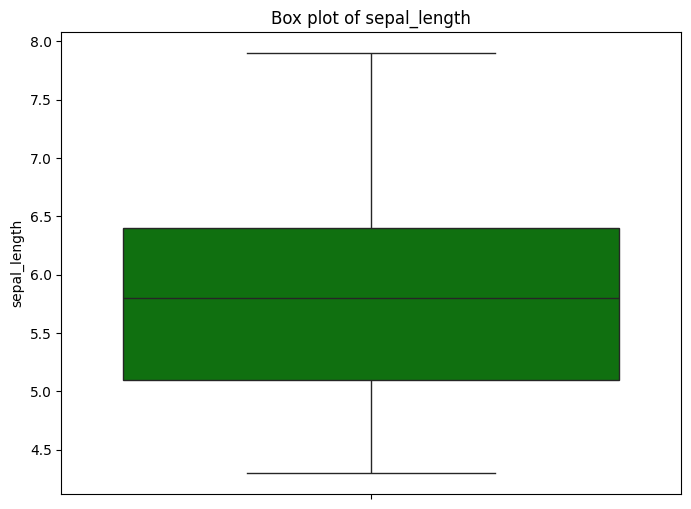

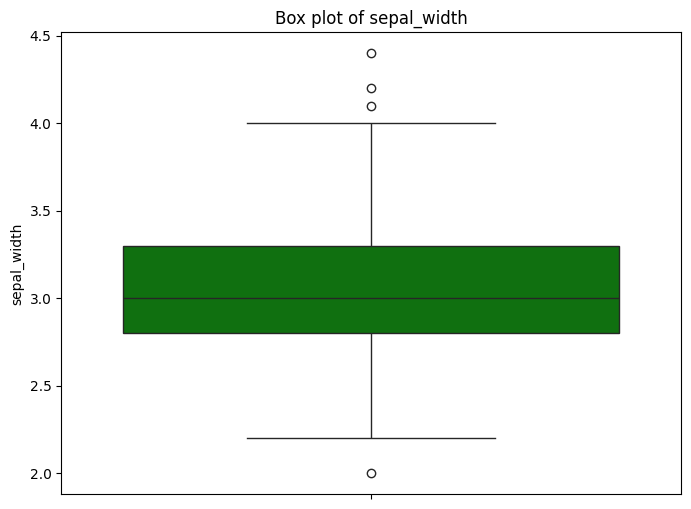

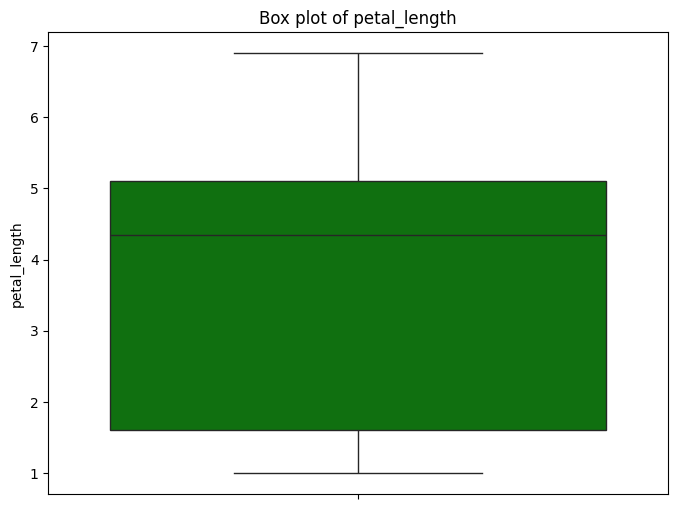

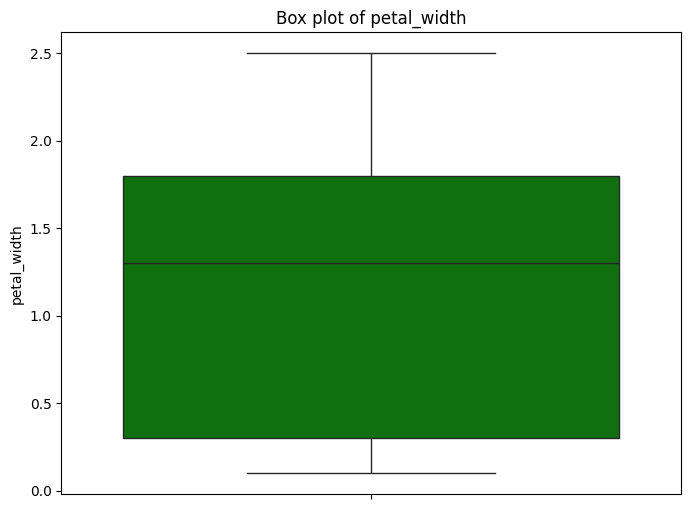

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns 
numerical_cols=["sepal_length" ,"sepal_width" ,"petal_length" , "petal_width"]
for i in numerical_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(data = df[i], color = "green" )
    plt.title("Box plot of " +  i)
    plt.show
    


In [15]:
for i in numerical_cols:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    upper_bound= Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR
    outliers = df[(df[i] < lower_bound) | (df[i] > upper_bound)]
    print(f"Outliers in {i}:")
    print(outliers)
    


Outliers in sepal_length:
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []
Outliers in sepal_width:
    sepal_length  sepal_width  petal_length  petal_width     species
15           5.7          4.4           1.5          0.4      setosa
32           5.2          4.1           1.5          0.1      setosa
33           5.5          4.2           1.4          0.2      setosa
60           5.0          2.0           3.5          1.0  versicolor
Outliers in petal_length:
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []
Outliers in petal_width:
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []


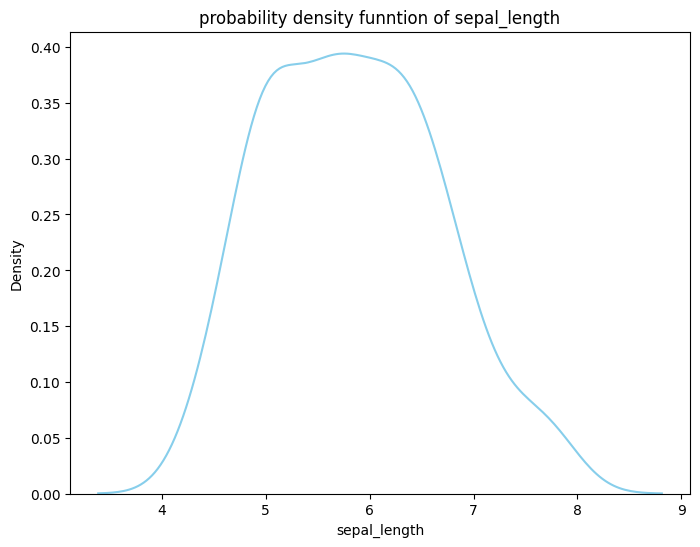

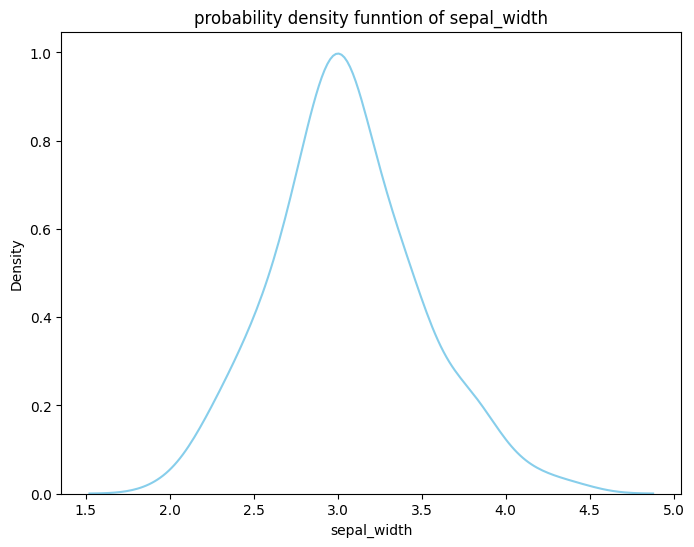

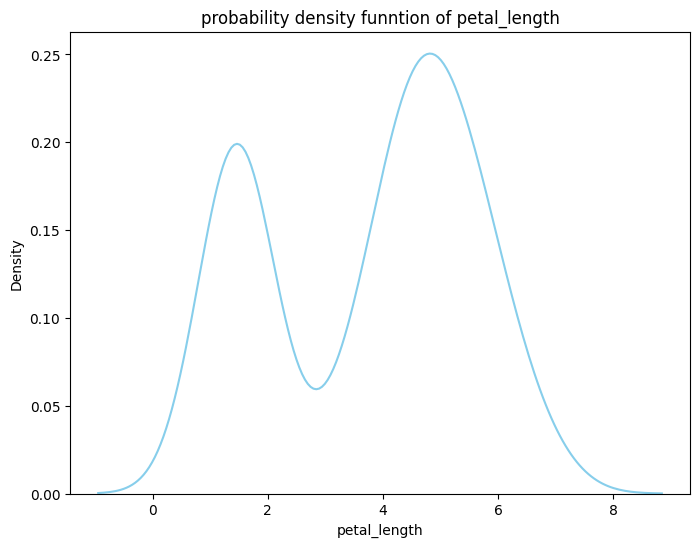

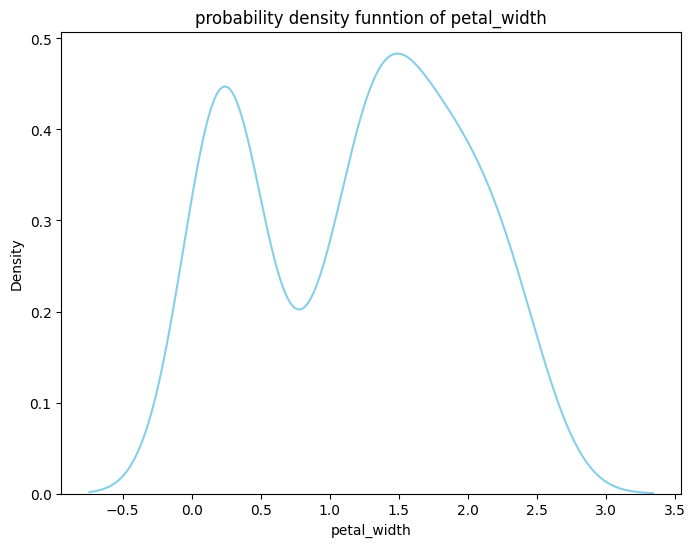

In [17]:
import matplotlib.pyplot as plt 
import seaborn as sns 
for i in numerical_cols:
    plt.figure(figsize=(8,6))
    sns.kdeplot(data = df[i], color="skyblue")
    plt.title("probability density funntion of "+ i)
    plt.show()

### Data scaling and visualization 


In [4]:
df_scaler = df.copy()

In [11]:
from sklearn.preprocessing import StandardScaler, RobustScaler
standard_scaler_cols=["sepal_length" ,"petal_length" , "petal_width"]
stand_scaler = StandardScaler()
robust_scaler = RobustScaler()
df_scaler[standard_scaler_cols]=stand_scaler.fit_transform(df_scaler[standard_scaler_cols])
df_scaler[["sepal_width"]]=robust_scaler.fit_transform(df_scaler[["sepal_width"]])  
df_scaler.head(15)
    

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.0,-1.341272,-1.312977,setosa
1,-1.143017,0.0,-1.341272,-1.312977,setosa
2,-1.385353,0.4,-1.398138,-1.312977,setosa
3,-1.506521,0.2,-1.284407,-1.312977,setosa
4,-1.021849,1.2,-1.341272,-1.312977,setosa
5,-0.537178,1.8,-1.170675,-1.050031,setosa
6,-1.506521,0.8,-1.341272,-1.181504,setosa
7,-1.021849,0.8,-1.284407,-1.312977,setosa
8,-1.748856,-0.2,-1.341272,-1.312977,setosa
9,-1.143017,0.2,-1.284407,-1.444450,setosa


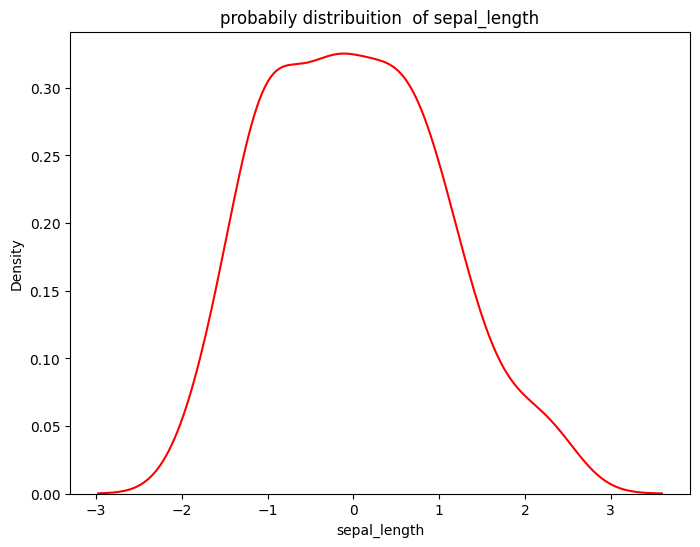

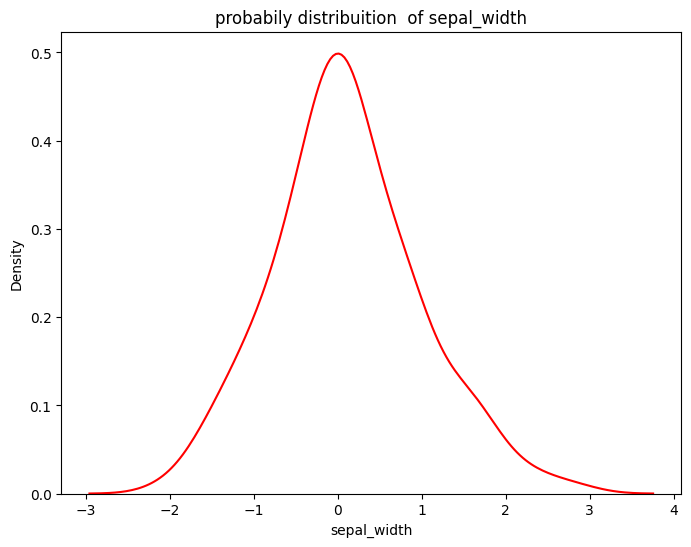

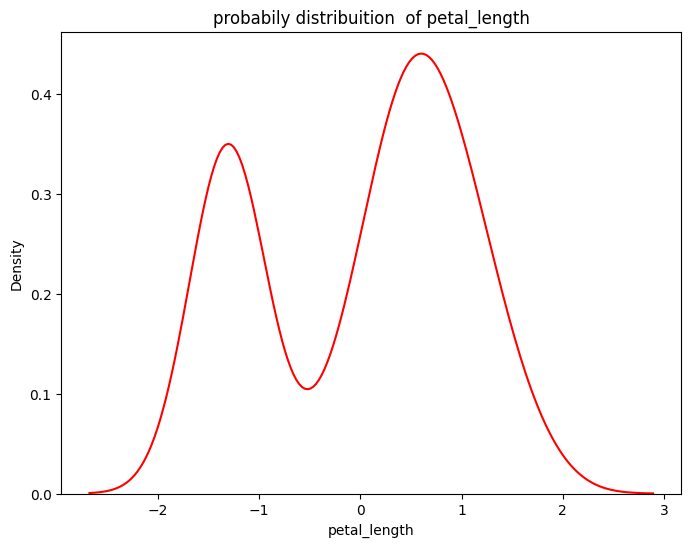

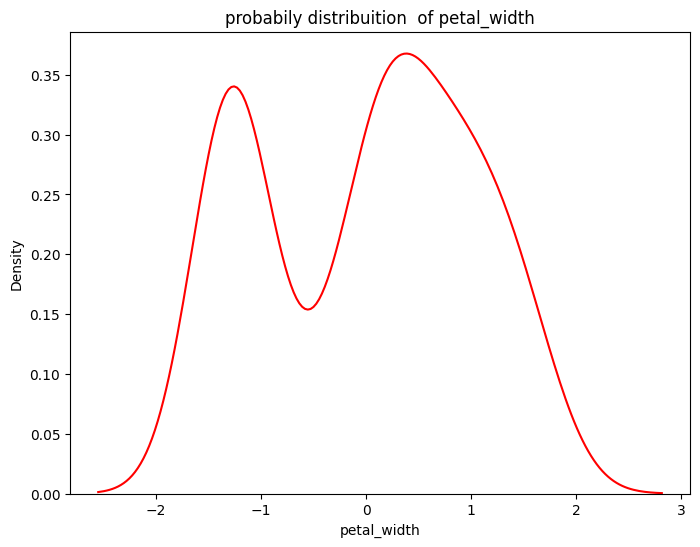

In [15]:
import matplotlib.pyplot as plt 
import seaborn as sns 
numerical_cols=["sepal_length" ,"sepal_width" ,"petal_length" , "petal_width"]
for i in numerical_cols:
    plt.figure(figsize=(8,6))
    sns.kdeplot(data = df_scaler[i], color = "red")
    plt.title("probabily distribuition  of "+ i)
    plt.grid
    plt.show()


#### Check linearity of Data

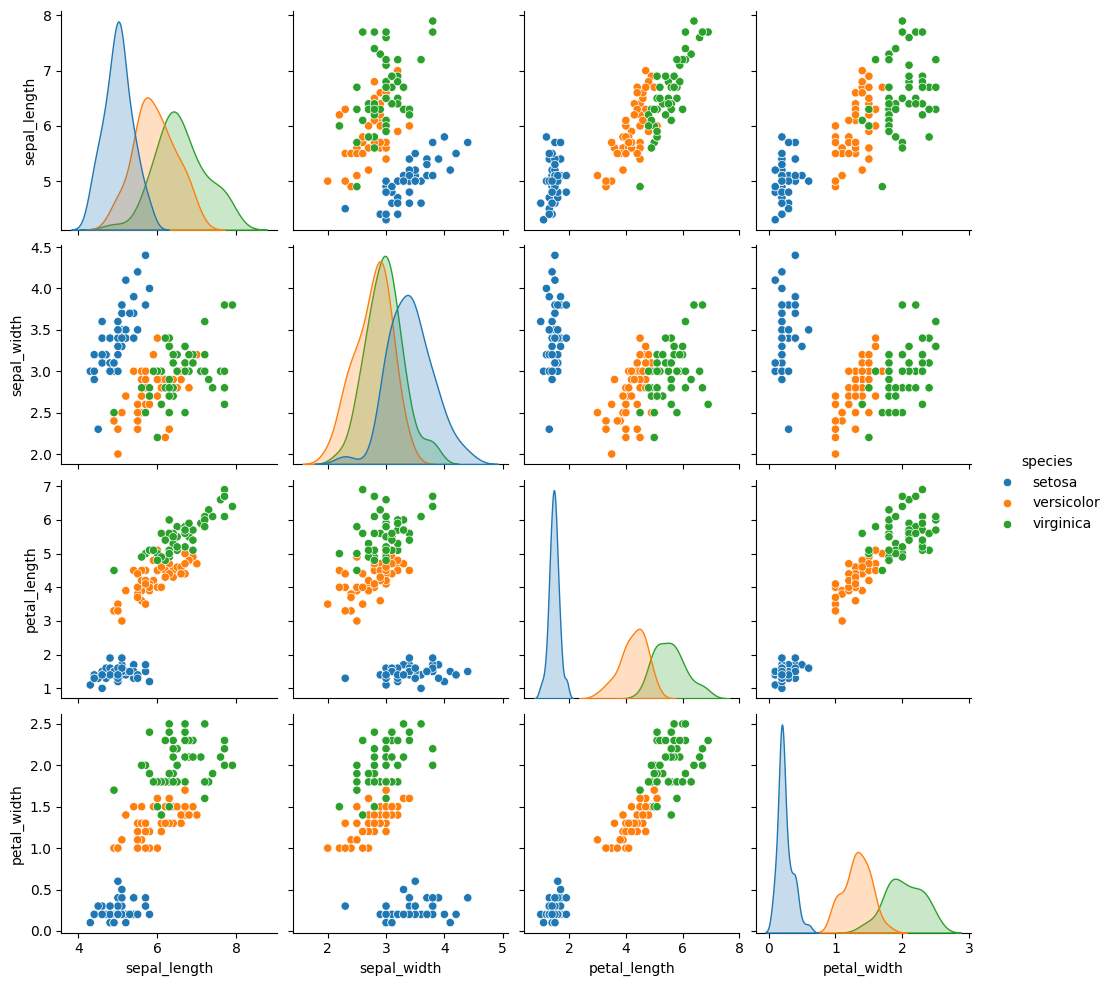

In [22]:
import matplotlib.pyplot as plt 
import seaborn as sns
target = "species"
sns.pairplot(df, hue=target)


##### Model Training and Evaluation 

In [20]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



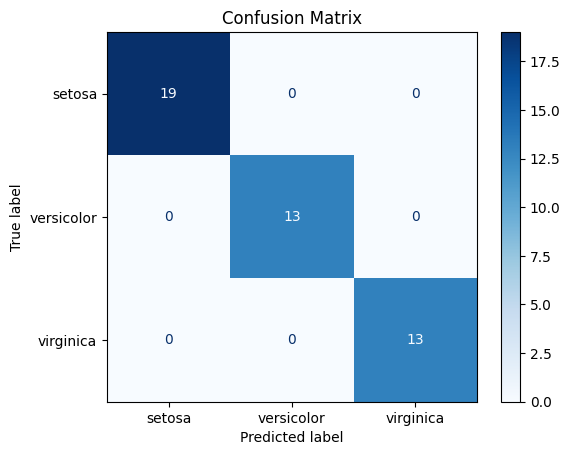

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [23]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
X = df_scaler.drop('species', axis=1)  
y = df_scaler['species']               
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



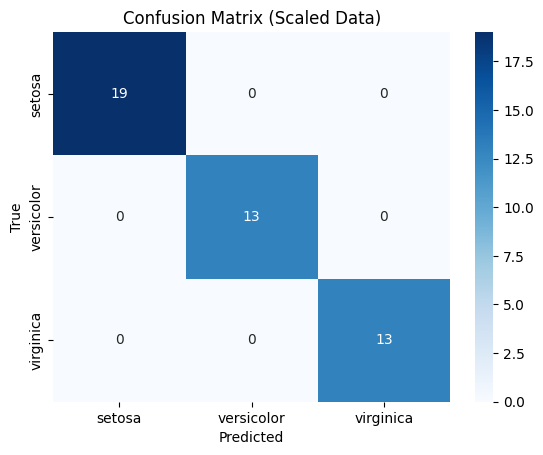

In [24]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=model.classes_,  yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Scaled Data)')
plt.show()

Accuracy (Original Data): 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



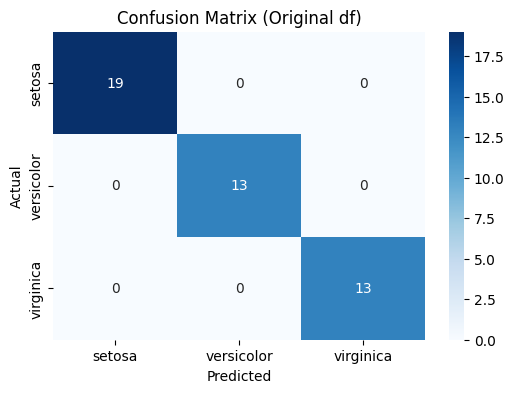

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy (Original Data):", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=lr_model.classes_, yticklabels=lr_model.classes_)
plt.title("Confusion Matrix (Original df)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Accuracy (Scaled Data): 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



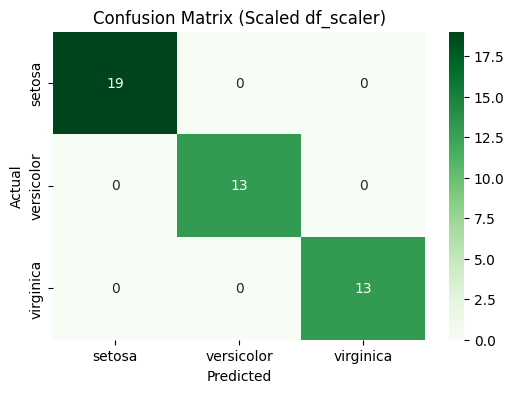

In [26]:
X_scaled = df_scaler.drop('species', axis=1)
y_scaled = df_scaler['species']
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)
lr_model_scaled = LogisticRegression(max_iter=200)
lr_model_scaled.fit(X_train_scaled, y_train_scaled)
y_pred_scaled = lr_model_scaled.predict(X_test_scaled)
cm_scaled = confusion_matrix(y_test_scaled, y_pred_scaled)
print("Accuracy (Scaled Data):", accuracy_score(y_test_scaled, y_pred_scaled))
print("Classification Report:\n", classification_report(y_test_scaled, y_pred_scaled))
plt.figure(figsize=(6,4))
sns.heatmap(cm_scaled, annot=True, fmt="d", cmap="Greens", xticklabels=lr_model_scaled.classes_, yticklabels=lr_model_scaled.classes_)
plt.title("Confusion Matrix (Scaled df_scaler)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
